# CAPSTONE PROJECT 1 : CHESS WINNER PREDICTION

![chess.jpg](attachment:chess.jpg)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('D:\\Dataset\\chess.csv')

In [ ]:
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.500000e+12,1.500000e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


TO CHECK INFORMATION ABOUT DATA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


To Check Null Values

In [ ]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

##### There is No Null Values

TO CHECK UNIQUE VALUES

In [ ]:
df.nunique()

id                19113
rated                 2
created_at         2626
last_move_at       2657
turns               211
victory_status        4
winner                3
increment_code      400
white_id           9438
white_rating       1516
black_id           9331
black_rating       1521
moves             18920
opening_eco         365
opening_name       1477
opening_ply          23
dtype: int64

TO DESCRIBE THE VALUES BEFORE FEATURE SCALING AND FEATURE ENGINEERING

In [ ]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483208e+12,1.483208e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.831972e+10,2.831967e+10,33.570585,291.253376,291.036126,2.797152
min,1.376770e+12,1.376770e+12,1.000000,784.000000,789.000000,1.000000
25%,1.479640e+12,1.479642e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.497030e+12,1.497030e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.500708e+12,1.500708e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504490e+12,1.504490e+12,349.000000,2700.000000,2723.000000,28.000000


TO SPLIT DEPENDENT AND INDEPENDENT VARIABLE

In [ ]:
x = df.drop(['id','white_id','black_id','winner'],axis=1)

In [ ]:
y = df['winner']

In [ ]:
x.head(2)

,rated,created_at,last_move_at,turns,victory_status,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,1.500000e+12,1.500000e+12,13,outoftime,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,True,1.500000e+12,1.500000e+12,16,resign,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


To change Target values into categorical Numeric values, Because Target Encoder support Numeric categorical values

In [ ]:
Y = []
for i in y:
    if i=='white':
        Y.append(1)
    elif i=='black':
        Y.append(0)
    else:
        Y.append(2)

USING TARGET ENCODER FOR TEXT CATEGORAL VARIABLES

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
Model = TargetEncoder()

In [ ]:
Col = ['increment_code','moves','victory_status','opening_name','opening_eco']

In [ ]:
b = Model.fit_transform(df['opening_eco'],Y)

In [ ]:
for i in Col:
    x[i] = Model.fit_transform(x[i],Y)

In [ ]:
x

,rated,created_at,last_move_at,turns,victory_status,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,1.500000e+12,1.500000e+12,13,0.536310,0.590001,1500,1191,0.646241,0.545460,0.486493,5
1,True,1.500000e+12,1.500000e+12,16,0.524267,0.554839,1322,1261,0.516132,0.689034,0.594546,4
2,True,1.500000e+12,1.500000e+12,61,0.528696,0.554839,1496,1500,0.646241,0.505185,0.487013,3
3,True,1.500000e+12,1.500000e+12,61,0.528696,0.582589,1439,1454,0.651016,0.599078,0.675432,3
4,True,1.500000e+12,1.500000e+12,95,0.528696,0.649829,1523,1469,0.651016,0.654124,0.755554,5
...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,1.499790e+12,1.499790e+12,24,0.524267,0.678873,1691,1220,0.646241,0.635102,0.603545,2
20054,True,1.499700e+12,1.499700e+12,82,0.528696,0.579718,1233,1196,0.516132,0.599973,0.736431,2
20055,True,1.499700e+12,1.499700e+12,35,0.528696,0.579718,1219,1286,0.646241,0.564276,0.612069,3
20056,True,1.499700e+12,1.499700e+12,109,0.524267,0.579718,1360,1227,0.646241,0.674342,0.536495,4


USING LABEL ENCODER FOR CATEGORICAL VARIABLES

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Model1 = LabelEncoder()

In [ ]:
x['rated'] = Model1.fit_transform(x['rated'])

In [ ]:
x

,rated,created_at,last_move_at,turns,victory_status,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,0,1.500000e+12,1.500000e+12,13,0.536310,0.590001,1500,1191,0.646241,0.545460,0.486493,5
1,1,1.500000e+12,1.500000e+12,16,0.524267,0.554839,1322,1261,0.516132,0.689034,0.594546,4
2,1,1.500000e+12,1.500000e+12,61,0.528696,0.554839,1496,1500,0.646241,0.505185,0.487013,3
3,1,1.500000e+12,1.500000e+12,61,0.528696,0.582589,1439,1454,0.651016,0.599078,0.675432,3
4,1,1.500000e+12,1.500000e+12,95,0.528696,0.649829,1523,1469,0.651016,0.654124,0.755554,5
...,...,...,...,...,...,...,...,...,...,...,...,...
20053,1,1.499790e+12,1.499790e+12,24,0.524267,0.678873,1691,1220,0.646241,0.635102,0.603545,2
20054,1,1.499700e+12,1.499700e+12,82,0.528696,0.579718,1233,1196,0.516132,0.599973,0.736431,2
20055,1,1.499700e+12,1.499700e+12,35,0.528696,0.579718,1219,1286,0.646241,0.564276,0.612069,3
20056,1,1.499700e+12,1.499700e+12,109,0.524267,0.579718,1360,1227,0.646241,0.674342,0.536495,4


In [ ]:
df1 = pd.DataFrame(x)

In [ ]:
df1['winner'] = Y

In [ ]:
df1

,rated,created_at,last_move_at,turns,victory_status,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,winner
0,0,1.500000e+12,1.500000e+12,13,0.536310,0.590001,1500,1191,0.646241,0.545460,0.486493,5,1
1,1,1.500000e+12,1.500000e+12,16,0.524267,0.554839,1322,1261,0.516132,0.689034,0.594546,4,0
2,1,1.500000e+12,1.500000e+12,61,0.528696,0.554839,1496,1500,0.646241,0.505185,0.487013,3,1
3,1,1.500000e+12,1.500000e+12,61,0.528696,0.582589,1439,1454,0.651016,0.599078,0.675432,3,1
4,1,1.500000e+12,1.500000e+12,95,0.528696,0.649829,1523,1469,0.651016,0.654124,0.755554,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,1,1.499790e+12,1.499790e+12,24,0.524267,0.678873,1691,1220,0.646241,0.635102,0.603545,2,1
20054,1,1.499700e+12,1.499700e+12,82,0.528696,0.579718,1233,1196,0.516132,0.599973,0.736431,2,0
20055,1,1.499700e+12,1.499700e+12,35,0.528696,0.579718,1219,1286,0.646241,0.564276,0.612069,3,1
20056,1,1.499700e+12,1.499700e+12,109,0.524267,0.579718,1360,1227,0.646241,0.674342,0.536495,4,1


USING HEATMAP FOR CHECK CORRELATION

<AxesSubplot:>

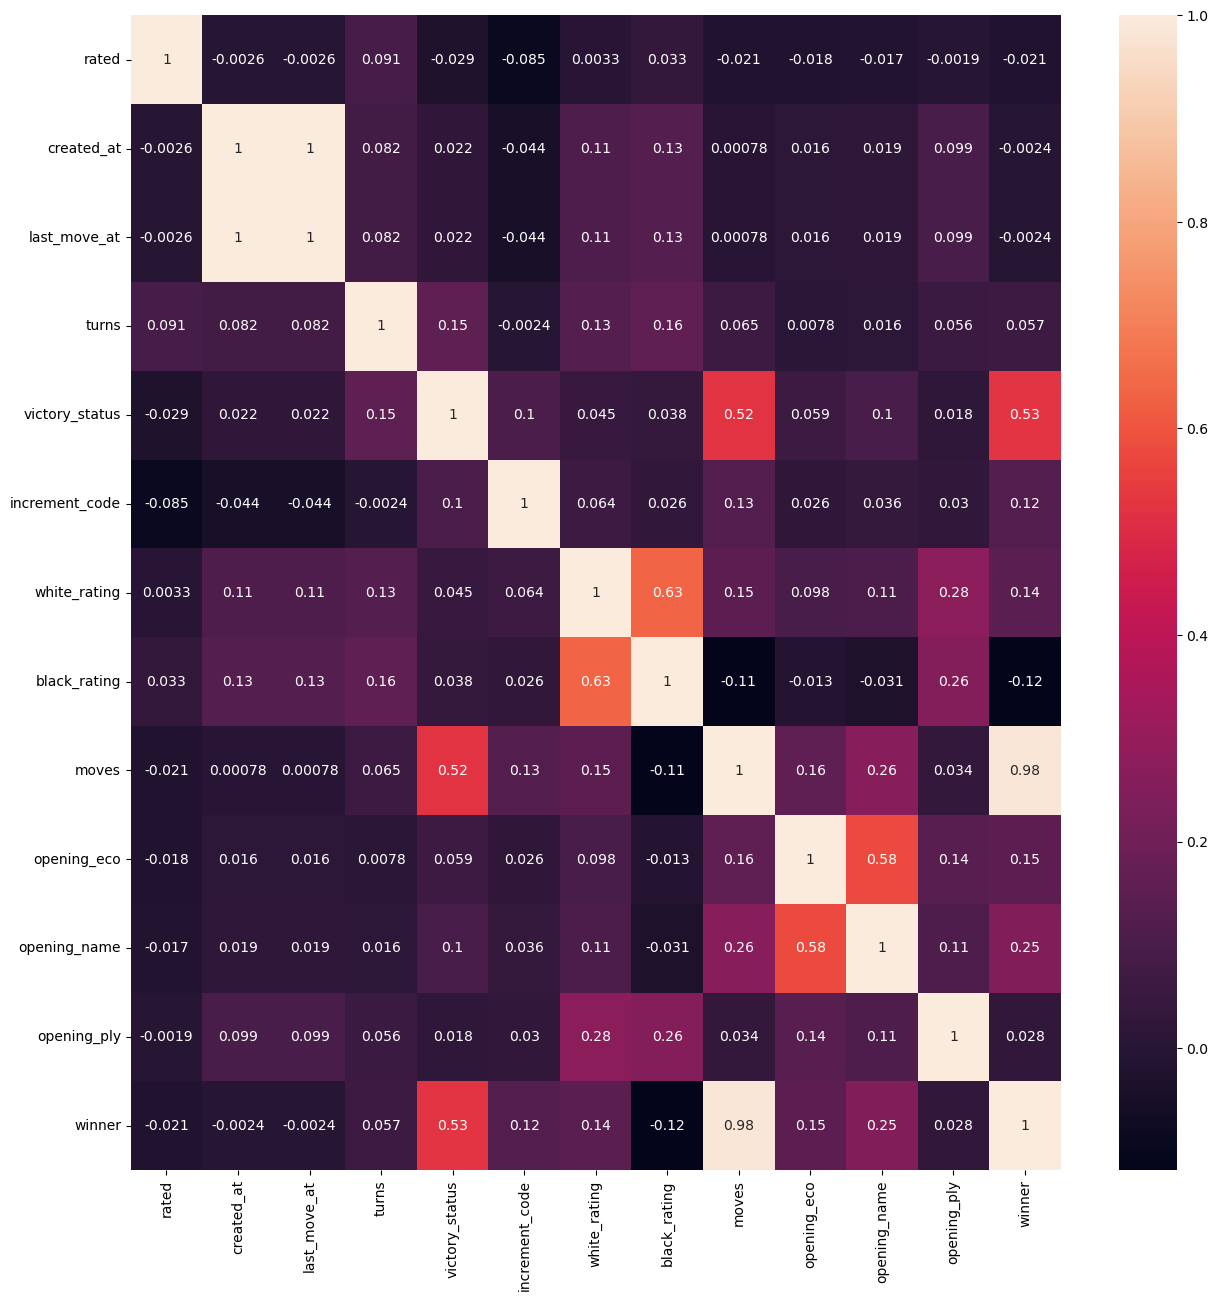

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True)

USING FEATURE SCALING FOR PARTICULAR COLUMNS (MINMAXSCALER)

In [ ]:
Col1 = ['turns','white_rating','black_rating','opening_ply']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Model2 = MinMaxScaler()

In [ ]:
for i in Col1:
    x[i] = Model2.fit_transform(x[[i]])

In [ ]:
x

,rated,created_at,last_move_at,turns,victory_status,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,winner
0,0,1.500000e+12,1.500000e+12,0.034483,0.536310,0.590001,0.373695,0.207859,0.646241,0.545460,0.486493,0.148148,1
1,1,1.500000e+12,1.500000e+12,0.043103,0.524267,0.554839,0.280793,0.244054,0.516132,0.689034,0.594546,0.111111,0
2,1,1.500000e+12,1.500000e+12,0.172414,0.528696,0.554839,0.371608,0.367632,0.646241,0.505185,0.487013,0.074074,1
3,1,1.500000e+12,1.500000e+12,0.172414,0.528696,0.582589,0.341858,0.343847,0.651016,0.599078,0.675432,0.074074,1
4,1,1.500000e+12,1.500000e+12,0.270115,0.528696,0.649829,0.385699,0.351603,0.651016,0.654124,0.755554,0.148148,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,1,1.499790e+12,1.499790e+12,0.066092,0.524267,0.678873,0.473382,0.222854,0.646241,0.635102,0.603545,0.037037,1
20054,1,1.499700e+12,1.499700e+12,0.232759,0.528696,0.579718,0.234342,0.210445,0.516132,0.599973,0.736431,0.037037,0
20055,1,1.499700e+12,1.499700e+12,0.097701,0.528696,0.579718,0.227035,0.256980,0.646241,0.564276,0.612069,0.074074,1
20056,1,1.499700e+12,1.499700e+12,0.310345,0.524267,0.579718,0.300626,0.226474,0.646241,0.674342,0.536495,0.111111,1


In [ ]:
X = x.drop(['created_at','last_move_at'],axis=1)

In [ ]:
X

,rated,turns,victory_status,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,winner
0,0,0.034483,0.536310,0.590001,0.373695,0.207859,0.646241,0.545460,0.486493,0.148148,1
1,1,0.043103,0.524267,0.554839,0.280793,0.244054,0.516132,0.689034,0.594546,0.111111,0
2,1,0.172414,0.528696,0.554839,0.371608,0.367632,0.646241,0.505185,0.487013,0.074074,1
3,1,0.172414,0.528696,0.582589,0.341858,0.343847,0.651016,0.599078,0.675432,0.074074,1
4,1,0.270115,0.528696,0.649829,0.385699,0.351603,0.651016,0.654124,0.755554,0.148148,1
...,...,...,...,...,...,...,...,...,...,...,...
20053,1,0.066092,0.524267,0.678873,0.473382,0.222854,0.646241,0.635102,0.603545,0.037037,1
20054,1,0.232759,0.528696,0.579718,0.234342,0.210445,0.516132,0.599973,0.736431,0.037037,0
20055,1,0.097701,0.528696,0.579718,0.227035,0.256980,0.646241,0.564276,0.612069,0.074074,1
20056,1,0.310345,0.524267,0.579718,0.300626,0.226474,0.646241,0.674342,0.536495,0.111111,1


TO DESCRIBE THE VALUES AFTER FEATURE SCALING AND FEATURE ENGINEERING

In [ ]:
X.describe()

,rated,turns,victory_status,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply,winner
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,0.805414,0.170879,0.593329,0.591816,0.424129,0.413564,0.592917,0.590812,0.590605,0.141370,0.593329
std,0.395891,0.096467,0.305977,0.044639,0.152011,0.150484,0.077817,0.072510,0.086215,0.103598,0.579682
min,0.000000,0.000000,0.524267,0.421979,0.000000,0.000000,0.271117,0.362837,0.328660,0.000000,0.000000
25%,1.000000,0.103448,0.524267,0.579718,0.320459,0.311272,0.516132,0.553097,0.528705,0.074074,0.000000
50%,1.000000,0.155172,0.524267,0.579718,0.408664,0.399690,0.646241,0.584123,0.589552,0.111111,1.000000
75%,1.000000,0.224138,0.528696,0.592141,0.526618,0.514478,0.646241,0.640449,0.650000,0.185185,1.000000
max,1.000000,1.000000,2.000000,0.905565,1.000000,1.000000,0.810611,0.843384,0.851426,1.000000,2.000000


TO CHECK CORRELATION USING HEATMAP THE VALUES AFTER FEATURE SCALING AND FEATURE ENGINEERING

<AxesSubplot:>

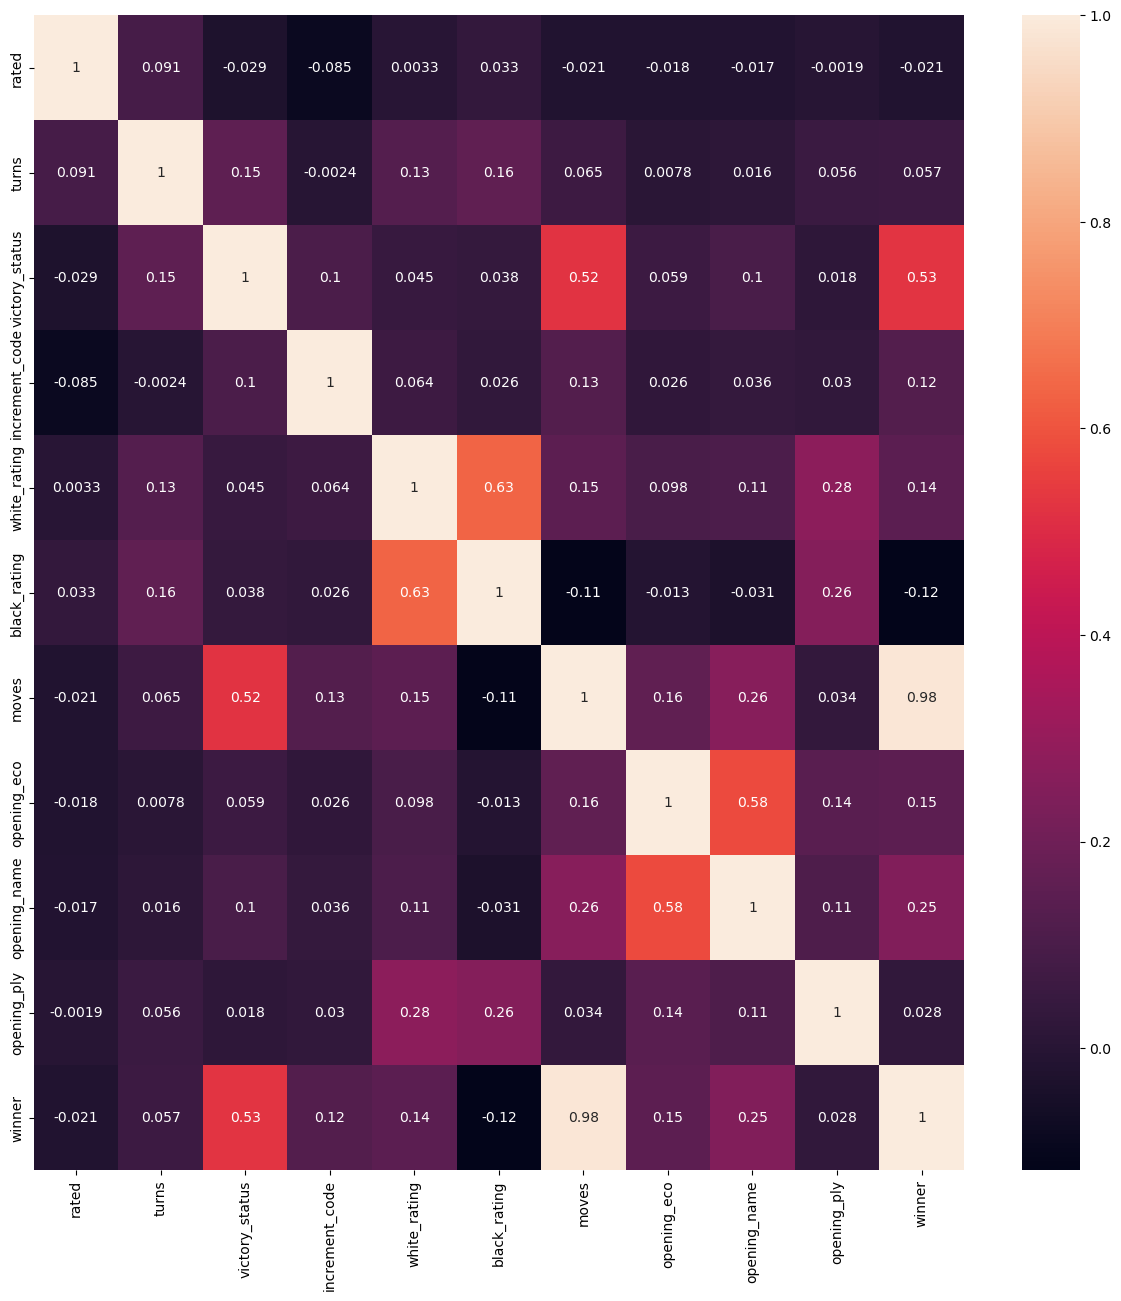

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True)

In [ ]:
Y =x['winner']

In [ ]:
Y

0        1
1        0
2        1
3        1
4        1
        ..
20053    1
20054    0
20055    1
20056    1
20057    0
Name: winner, Length: 20058, dtype: int64

In [ ]:
X.drop('winner',axis=1,inplace=True)

In [ ]:
X

,rated,turns,victory_status,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,0,0.034483,0.536310,0.590001,0.373695,0.207859,0.646241,0.545460,0.486493,0.148148
1,1,0.043103,0.524267,0.554839,0.280793,0.244054,0.516132,0.689034,0.594546,0.111111
2,1,0.172414,0.528696,0.554839,0.371608,0.367632,0.646241,0.505185,0.487013,0.074074
3,1,0.172414,0.528696,0.582589,0.341858,0.343847,0.651016,0.599078,0.675432,0.074074
4,1,0.270115,0.528696,0.649829,0.385699,0.351603,0.651016,0.654124,0.755554,0.148148
...,...,...,...,...,...,...,...,...,...,...
20053,1,0.066092,0.524267,0.678873,0.473382,0.222854,0.646241,0.635102,0.603545,0.037037
20054,1,0.232759,0.528696,0.579718,0.234342,0.210445,0.516132,0.599973,0.736431,0.037037
20055,1,0.097701,0.528696,0.579718,0.227035,0.256980,0.646241,0.564276,0.612069,0.074074
20056,1,0.310345,0.524267,0.579718,0.300626,0.226474,0.646241,0.674342,0.536495,0.111111


##### TO CHECK PREVALANCE RATE

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winner', ylabel='count'>

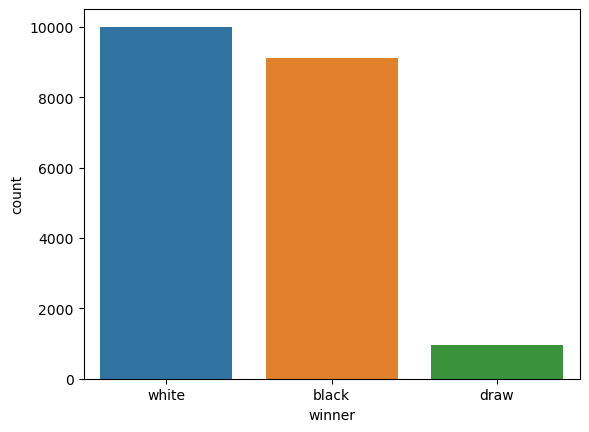

In [ ]:
sns.countplot(df.winner)

our Target variable is imbalanced so we use SMOTE to make our data Balanced

In [ ]:
from imblearn.over_sampling import SMOTE

import collections
counter = collections.Counter(y)
print('Before Counter :',counter)
smt = SMOTE()
x_smt,y_smt = smt.fit_resample(X,y)
counter = collections.Counter(y_smt)
print('After Counter :',counter)

Before Counter : Counter({'white': 10001, 'black': 9107, 'draw': 950})
After Counter : Counter({'white': 10001, 'black': 10001, 'draw': 10001})


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winner', ylabel='count'>

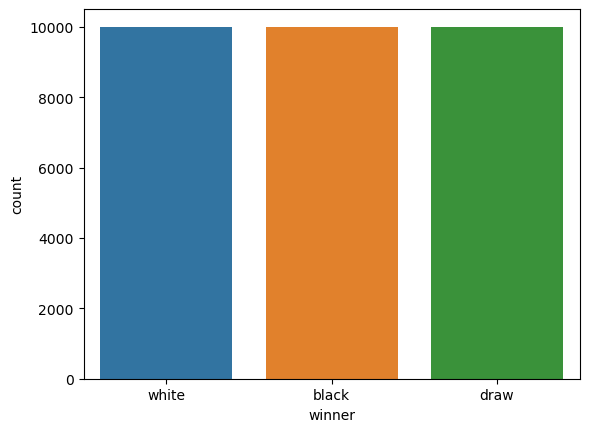

In [ ]:
sns.countplot(y_smt)

#### TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x_smt,y_smt,test_size=0.30,random_state=0)

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((21002, 10), (9001, 10), (21002,), (9001,))

#### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_Model = RandomForestClassifier()

In [ ]:
RF_Model.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
pred_train = RF_Model.predict(xtrain)

In [ ]:
pred_test = RF_Model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('Train Accuracy Score => ',accuracy_score(ytrain,pred_train))
print('Test Accuracy Score => ',accuracy_score(ytest,pred_test))

Train Accuracy Score =>  1.0
Test Accuracy Score =>  0.9991112098655704


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,pred_test))

              precision    recall  f1-score   support

       black       1.00      1.00      1.00      3035
        draw       1.00      1.00      1.00      2987
       white       1.00      1.00      1.00      2979

    accuracy                           1.00      9001
   macro avg       1.00      1.00      1.00      9001
weighted avg       1.00      1.00      1.00      9001



#### NAVIE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
pred_Train1 = gnb.predict(xtrain)
pred_Test1 = gnb.predict(xtest)

In [ ]:
print('Train Accuracy Score => ',accuracy_score(ytrain,pred_Train1))
print('Test Accuracy Score => ',accuracy_score(ytest,pred_Test1))

Train Accuracy Score =>  0.9981906485096658
Test Accuracy Score =>  0.9978891234307299


In [ ]:
print(classification_report(ytest,pred_Test1))

              precision    recall  f1-score   support

       black       1.00      1.00      1.00      3035
        draw       1.00      1.00      1.00      2987
       white       1.00      0.99      1.00      2979

    accuracy                           1.00      9001
   macro avg       1.00      1.00      1.00      9001
weighted avg       1.00      1.00      1.00      9001



#### SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

In [ ]:
Model_svm = SVC()

In [ ]:
Model_svm.fit(xtrain,ytrain)

SVC()

In [ ]:
PredTraiN = Model_svm.predict(xtrain)

In [ ]:
PredTesT = Model_svm.predict(xtest)

In [ ]:
print('Train Accuracy Score => ',accuracy_score(ytrain,PredTraiN))
print('Test Accuracy Score => ',accuracy_score(ytest,PredTesT))

Train Accuracy Score =>  0.9985239500999905
Test Accuracy Score =>  0.9984446172647483


In [ ]:
print(classification_report(ytest,PredTesT))

              precision    recall  f1-score   support

       black       1.00      1.00      1.00      3035
        draw       1.00      1.00      1.00      2987
       white       1.00      1.00      1.00      2979

    accuracy                           1.00      9001
   macro avg       1.00      1.00      1.00      9001
weighted avg       1.00      1.00      1.00      9001



TO CHECK HOW OUR MODEL WAS PERFORMED PARTICULAR DATA

In [ ]:
a=xtrain[:1:6]

In [ ]:
RF_Model.predict(a)

array(['white'], dtype=object)

In [ ]:
df[1878:].head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
1878,aKEBIuvF,True,1.490000e+12,1.490000e+12,79,resign,white,15+10,sharkey101,1839,akmar,1819,e4 e5 Nf3 Nc6 Bb5 d6 c3 Bd7 d4 a6 Ba4 b5 Bb3 h...,C62,Ruy Lopez: Steinitz Defense,6
